In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('USArrests.csv', index_col=[0])
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
df.rename(columns={'Rape':'Fraud'},inplace=True)
df.columns = df.columns.str.upper()
df.head()

,MURDER,ASSAULT,URBANPOP,FRAUD
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Question 1: 
    Load the data and analyse the Measures of Spread and Shape (Inter-Quartile Range (IQR), Kurtosis, and 
    Skew) of data in ASSAULT and FRAUD and print their values - Beginner

In [12]:
from scipy.stats import skew, kurtosis, iqr

In [18]:
print(f"ASSAULT [iqr, kurtosis, skew] : {iqr(df['ASSAULT'])},{round(kurtosis(df['ASSAULT']),2)},{round(skew(df['ASSAULT']),2)}")
print(f"FRAUD [iqr, kurtosis, skew] : {round(iqr(df['FRAUD']),2)},{round(kurtosis(df['FRAUD']),2)},{round(skew(df['FRAUD']),2)}")

ASSAULT [iqr, kurtosis, skew] : 140.0,-1.07,0.23
FRAUD [iqr, kurtosis, skew] : 11.1,0.2,0.78


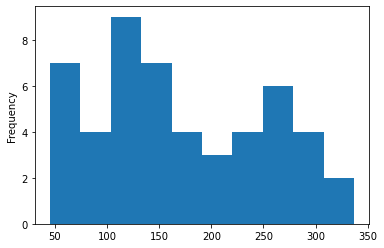

In [22]:
df['ASSAULT'].plot(kind='hist')
plt.show()

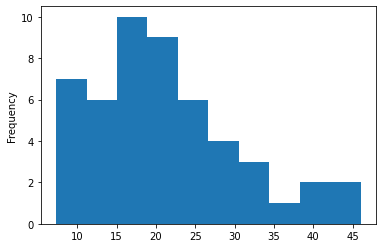

In [23]:
df['FRAUD'].plot(kind='hist')
plt.show()

### Question 2:
    Obtain the Z-Scores based on data in the Assault column - Intermediate 

In [36]:
from scipy.stats import zscore
zscore(df['ASSAULT'])

array([ 0.79078716,  1.11805959,  1.49381682,  0.23321191,  1.2756352 ,
        0.40290872, -0.73648418,  0.81502956,  1.99078607,  0.48775713,
       -1.51224105, -0.61527217,  0.94836277, -0.70012057, -1.39102904,
       -0.67587817, -0.74860538,  0.94836277, -1.06375661,  1.56654403,
       -0.26375734,  1.02108998, -1.19708982,  1.06957478,  0.0877575 ,
       -0.74860538, -0.83345379,  0.98472638, -1.37890783, -0.14254532,
        1.38472601,  1.00896878,  2.01502847, -1.52436225, -0.61527217,
       -0.23951493, -0.14254532, -0.78496898,  0.03927269,  1.3119988 ,
       -1.027393  ,  0.20896951,  0.36654512, -0.61527217, -1.48799864,
       -0.17890893, -0.31224214, -1.08799901, -1.42739264, -0.11830292])

### Question 3: 
    Detect Outliers based on data in URBANPOP columns using IQR -Advanced (Bridging Gap Question) 

In [37]:
q1 = df['URBANPOP'].quantile(0.25)
q3 = df['URBANPOP'].quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

print(f"q1: {q1}, q3:{q3}, iqr: {iqr}, lower: {lower}, upper: {upper}")

q1: 54.5, q3:77.75, iqr: 23.25, lower: 19.625, upper: 112.625


In [39]:
df[(df['URBANPOP'] < lower) | (df['URBANPOP'] > upper)]

,MURDER,ASSAULT,URBANPOP,FRAUD


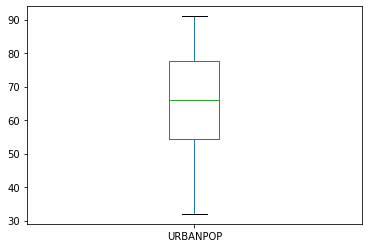

In [40]:
df['URBANPOP'].plot(kind='box')
plt.show()

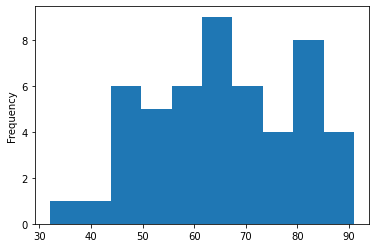

In [42]:
df['URBANPOP'].plot(kind='hist')
plt.show()

### Question 4: 
    Detect Outliers based on data in UrabnPop column using Z-Score - Advanced

In [43]:
df = pd.concat([df, pd.Series(zscore(df['URBANPOP']), name='URBANPOP_ZSCORE', index=df.index)], axis=1)
df.head()

,MURDER,ASSAULT,URBANPOP,FRAUD,URBANPOP_ZSCORE
Alabama,13.2,236,58,21.2,-0.526195
Alaska,10.0,263,48,44.5,-1.224067
Arizona,8.1,294,80,31.0,1.009122
Arkansas,8.8,190,50,19.5,-1.084492
California,9.0,276,91,40.6,1.776781


In [46]:
df[(df['URBANPOP_ZSCORE'] > 2) | (df['URBANPOP_ZSCORE'] < -2)]

,MURDER,ASSAULT,URBANPOP,FRAUD,URBANPOP_ZSCORE
Vermont,2.2,48,32,11.2,-2.340661


### Question 5: 
    Analyse the different statistics Range, Standard Deviation, and Variance of data in UrbanPop & Assault 
    and print their values - Beginner 

In [67]:
pd.concat([df[['URBANPOP','ASSAULT']].agg(['std','var']).T
           ,df[['URBANPOP','ASSAULT']].min(),df[['URBANPOP','ASSAULT']].max()],axis=1).rename(columns={0:'min',1:'max'})

,std,var,min,max
URBANPOP,14.474763,209.518776,32,91
ASSAULT,83.337661,6945.165714,45,337


In [69]:
print(np.ptp(df['URBANPOP']))
print(np.ptp(df['ASSAULT']))

59
292
